In [1]:
import matplotlib.pyplot as plt
import treatment
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def adjacent(cell, size=None): #size = [nlines, ncolumns] pour éviter de renvoyer des cellules hors labyrinthe
    if size==None:
        return [
            (cell[0]-1, cell[1]  ),
            (cell[0]  , cell[1]-1),
            (cell[0]+1, cell[1]  ),
            (cell[0]  , cell[1]+1)
        ]
    return [adj for adj in adjacent(cell) if (adj[0]>=0 and adj[0]<size[0] and adj[1]>=0 and adj[1]<size[1])]

In [3]:
def get_wall(c1, c2, height):
    """
    Revoie les coordonnées du mur entre les cases c1 et c2 d'un labyrinthe
    """
    if c1[0] == c2[0]: #Mur vertical
        x1 = int( (c1[1]+c2[1]+1)/2 )
        x2 = x1
        y1 = int( height - c1[0] )
        y2 = y1 - 1
        return ((x1, x2), (y1, y2))

    if c1[1] == c2[1]: #Mur horizontal
        x1 = int( c1[1] )
        x2 = x1 + 1
        y1 = int( height - (c1[0]+c2[0]+1)/2 )
        y2 = y1
        return ((x1, x2), (y1, y2))

In [4]:
def show_lab(ax, lab):
    """
    Affiche un labyrinthe lab donné dans un plote matplotlib
    """
    walls = []
    for key in [k for k in lab.keys() if type(k)!=type(' ')]:
        for cell in adjacent(key):
            if cell not in lab[key]:
                walls.append(get_wall(cell, key, lab["nlines"]))
    for wall in walls:
        ax.plot(wall[0], wall[1])
    return ax

In [5]:
#Exemple de structure de donnée représentant un labyrinthe
lab_c = {
    "nlines"  :3,
    "ncolumns":4,
    (0,0):[(1,0)      ], (0,1):[(1,1),(0,2)], (0,2):[(0,1),(0,3)], (0,3):[(0,2),(1,3)       ],
    (1,0):[(0,0),(2,0)], (1,1):[(0,1),(1,2)], (1,2):[(1,1),(1,3)], (1,3):[(1,2),(0,3), (2,3)],
    (2,0):[(1,0),(2,1)], (2,1):[(2,0),(2,2)], (2,2):[(2,1),(2,3)], (2,3):[(2,2),(1,3)       ]
}

<module 'matplotlib.pyplot' from '/home/lucas/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

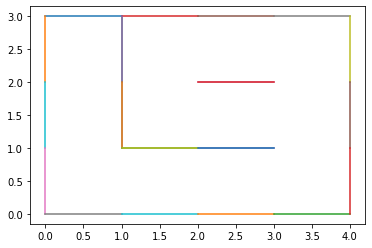

In [6]:
show_lab(plt, lab_c)

In [7]:
L_3x2 = treatment.generate_pseudo_lab(3,2)
L = L_3x2
print(len(L))
L[0]

128


{'ncolumns': 3,
 'nlines': 2,
 (0, 0): [(1, 0), (0, 1)],
 (0, 1): [(0, 0), (1, 1), (0, 2)],
 (0, 2): [(0, 1), (1, 2)],
 (1, 0): [(0, 0), (1, 1)],
 (1, 1): [(0, 1), (1, 0), (1, 2)],
 (1, 2): [(0, 2), (1, 1)]}

<ipython-input-8-e31cd151baf1>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


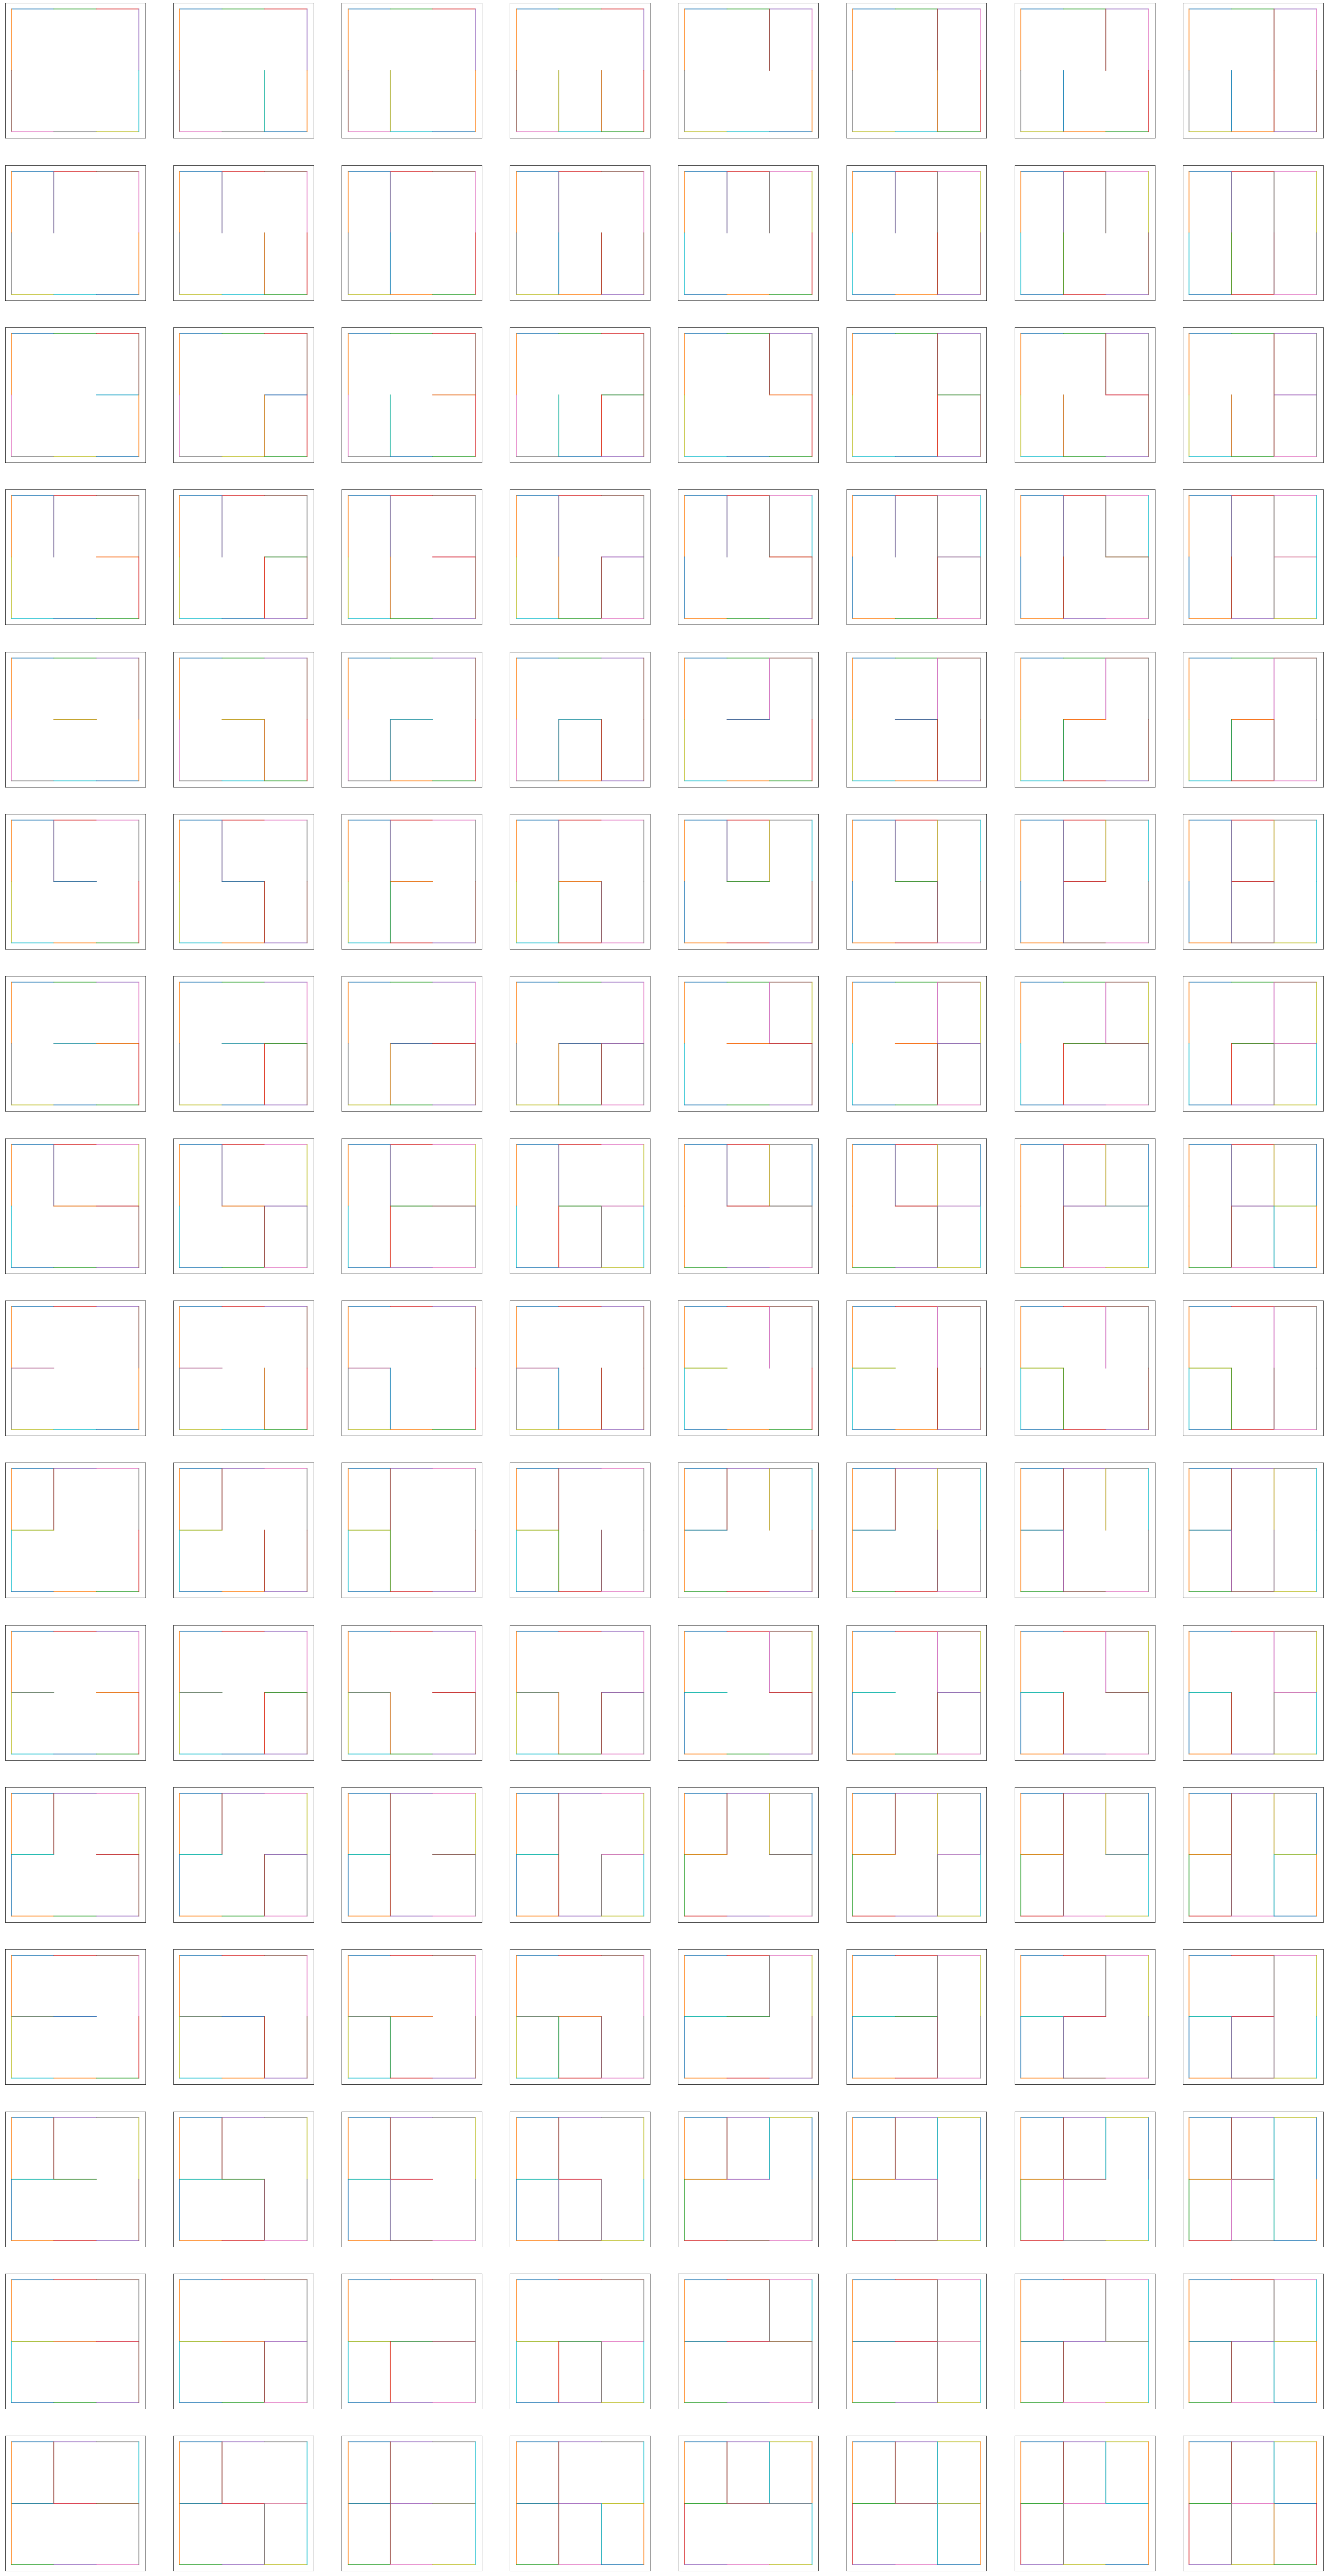

In [8]:
cols = 8
rows = len(L)//cols
fig, axs = plt.subplots(rows, cols, figsize = (50,50*(rows//cols)))
for i in range(rows):
    for n in range(cols):
        axs[i,n].set_yticklabels([])
        axs[i,n].set_xticklabels([])
        axs[i,n].set_xticks([])
        axs[i,n].set_yticks([])
        if(cols*i+n==len(L)):
            break
        else:
            show_lab(axs[i,n], L[cols*i+n])
            continue
        break
fig.savefig("data/3x2/Total.png", dpi=200)
fig.show()

In [9]:
for i in range(len(L)):
    plt.clf()
    show_lab(plt,L[i])
    plt.xticks([])
    plt.yticks([])
    plt.savefig("data/3x2/{}.png".format(i))
plt.clf()

<Figure size 432x288 with 0 Axes>

In [10]:
L_2x2 = treatment.generate_pseudo_lab(2,2)
L = L_2x2
print(len(L))
L[0]

16


{'ncolumns': 2,
 'nlines': 2,
 (0, 0): [(1, 0), (0, 1)],
 (0, 1): [(0, 0), (1, 1)],
 (1, 0): [(0, 0), (1, 1)],
 (1, 1): [(0, 1), (1, 0)]}

<ipython-input-11-0a39375b1da9>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


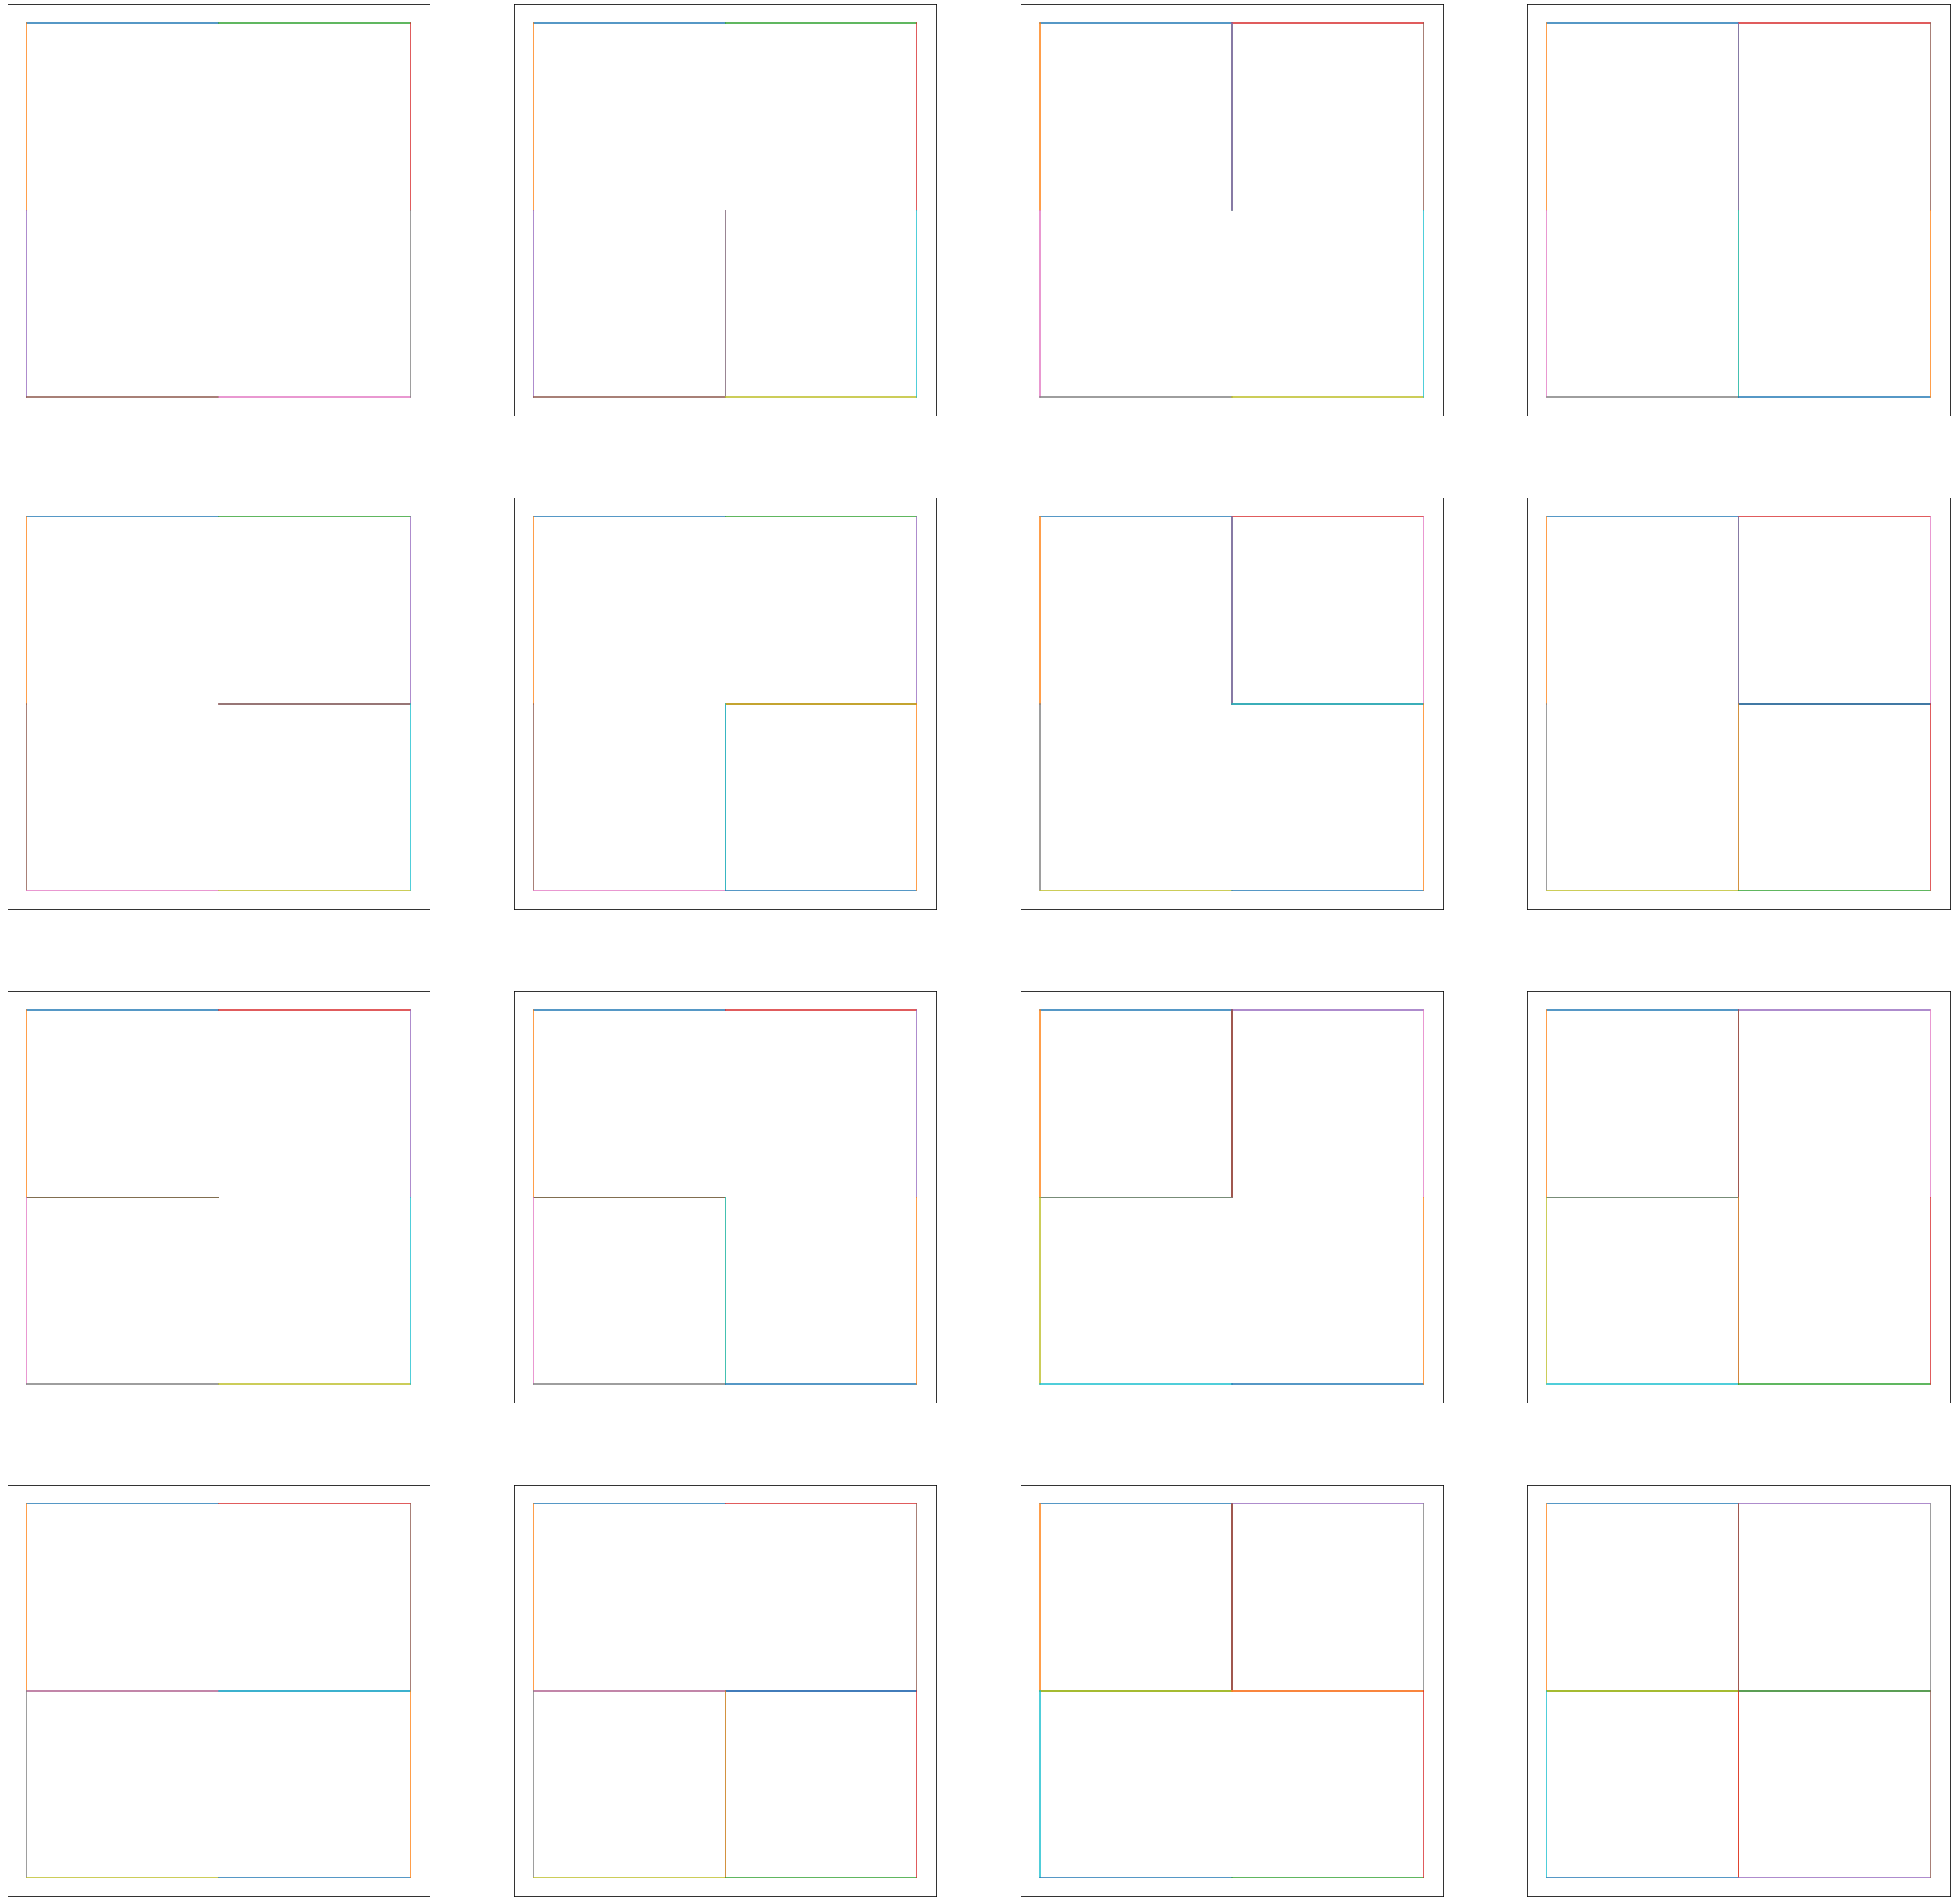

In [11]:
cols = 4
rows = len(L)//cols
fig, axs = plt.subplots(rows, cols, figsize = (50,50*(rows//cols)))
for i in range(rows):
    for n in range(cols):
        axs[i,n].set_yticklabels([])
        axs[i,n].set_xticklabels([])
        axs[i,n].set_xticks([])
        axs[i,n].set_yticks([])
        if(cols*i+n==len(L)):
            break
        else:
            show_lab(axs[i,n], L[cols*i+n])
            continue
        break
fig.savefig("data/2x2/Total.png", dpi=200)
fig.show()

In [12]:
for i in range(len(L)):
    plt.clf()
    show_lab(plt,L[i])
    plt.xticks([])
    plt.yticks([])
    plt.savefig("data/2x2/{}.png".format(i))
plt.clf()

<Figure size 432x288 with 0 Axes>